<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Exemplo_Fuzzy_Python_Exemplo_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy
!pip install -U scikit-learn
!pip show scikit-learn
!pip freeze
import sklearn; sklearn.show_versions()
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=e65facdb28263baf3253c421f08740e15236b7266fda0ebdcb1b44347c38b433
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
ERROR: Operation cancelled by user
^C
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Requ

In [2]:

#importa as bibliotecas básicas
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

k = 4 # número de clusters
n = 200 # número de pontos
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0] # atributos das observações
labels = data[1] # classe conhecida inicialmente


<Figure size 1000x500 with 0 Axes>

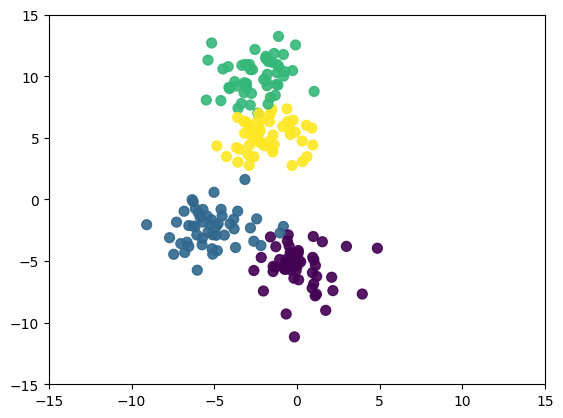

In [3]:
# mostra os dados
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)




In [4]:
# Método k-means para agrupamento de dados
from sklearn.cluster import KMeans

k = 4 # número de clusters a serem identificados


In [5]:
# define o método com k clusters
kmeans = KMeans(n_clusters=k)
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# define o tamanho da figura
plt.figure(figsize=(15,5))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

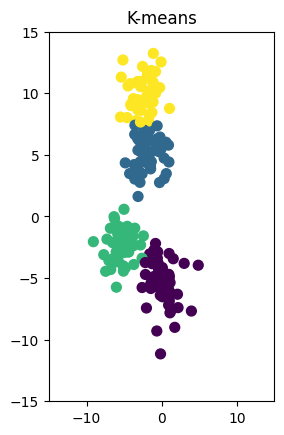

In [6]:
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('K-means')
centers = kmeans.cluster_centers_


<ipython-input-7-78646339a71c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


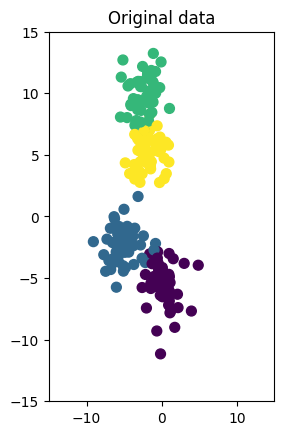

In [7]:
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); # show the cluster centers

# mostra o segundo gráfico
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('Original data')
plt.show(True)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

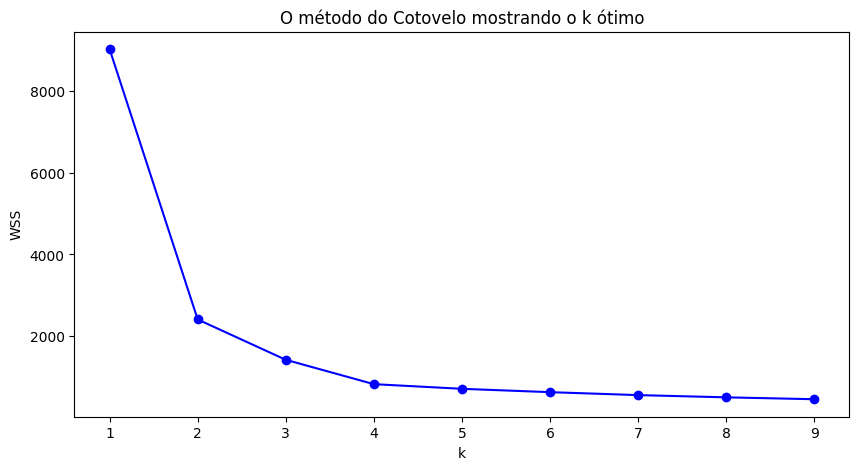

In [8]:
# Usando o Método do Cotovelo  WSS (elbow method)  - Within-cluster sum of squares WCSS
WSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista
    WSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(10,5))
plt.plot(K, WSS, '-bo')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('O método do Cotovelo mostrando o k ótimo')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


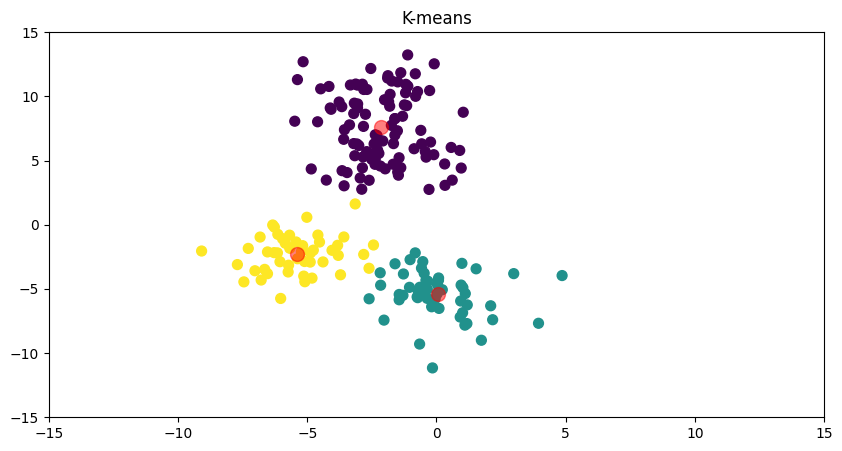

In [9]:
# assume três clusters
from sklearn.cluster import KMeans

# número de clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=100, alpha=0.5);
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('K-means')
plt.show(True)



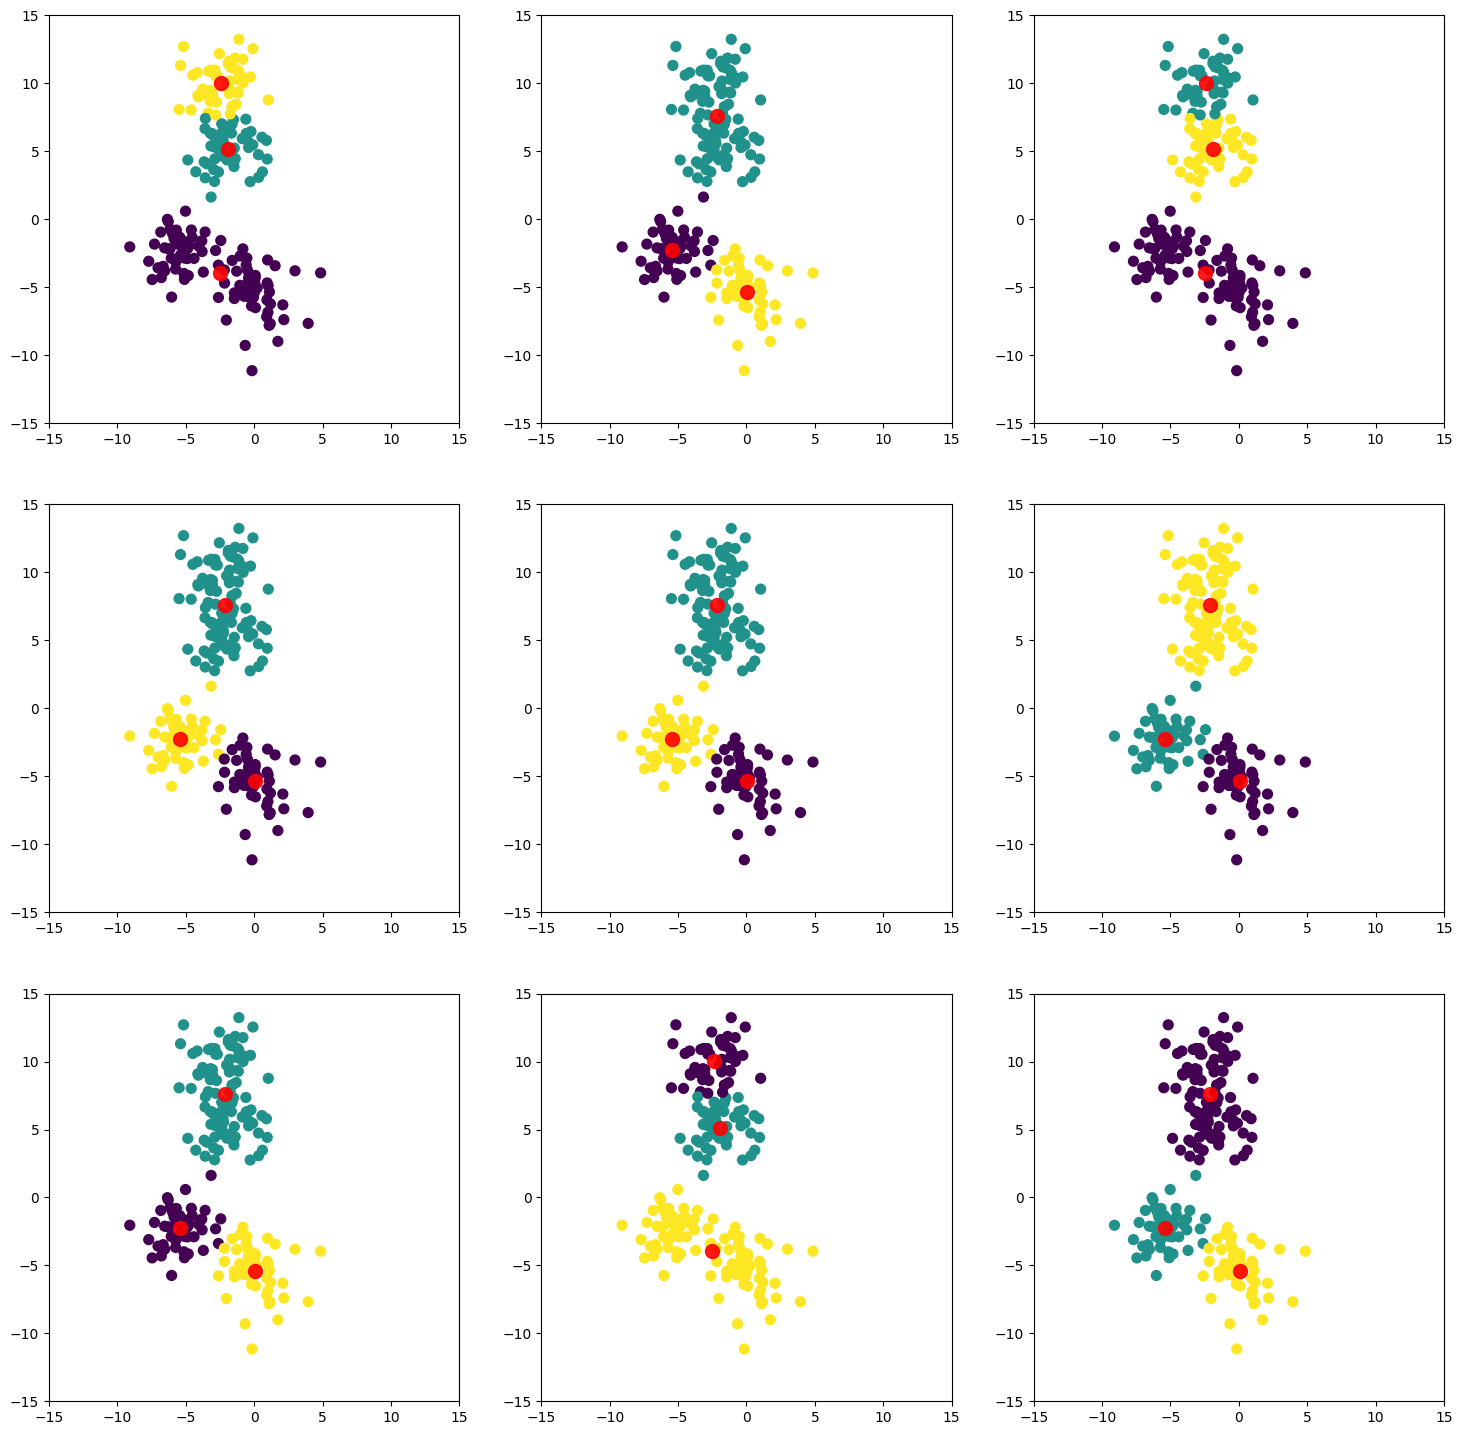

In [10]:
# k-means depende do valor inicial das sementes
from sklearn.cluster import KMeans
k = 3 # número de clusters
plt.figure(figsize=(18,18))
# Mostra 9 execuções diferentes do algoritmo no mesmo conjunto de dados
for s in np.arange(1,10):
    kmeans = KMeans(n_clusters=k, init= 'random', n_init=1)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    plt.subplot(3, 3, s)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:,1], c='red', s=100, alpha=0.9);
    plt.xlim(-15,15)
    plt.ylim(-15,15)
plt.show(True)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

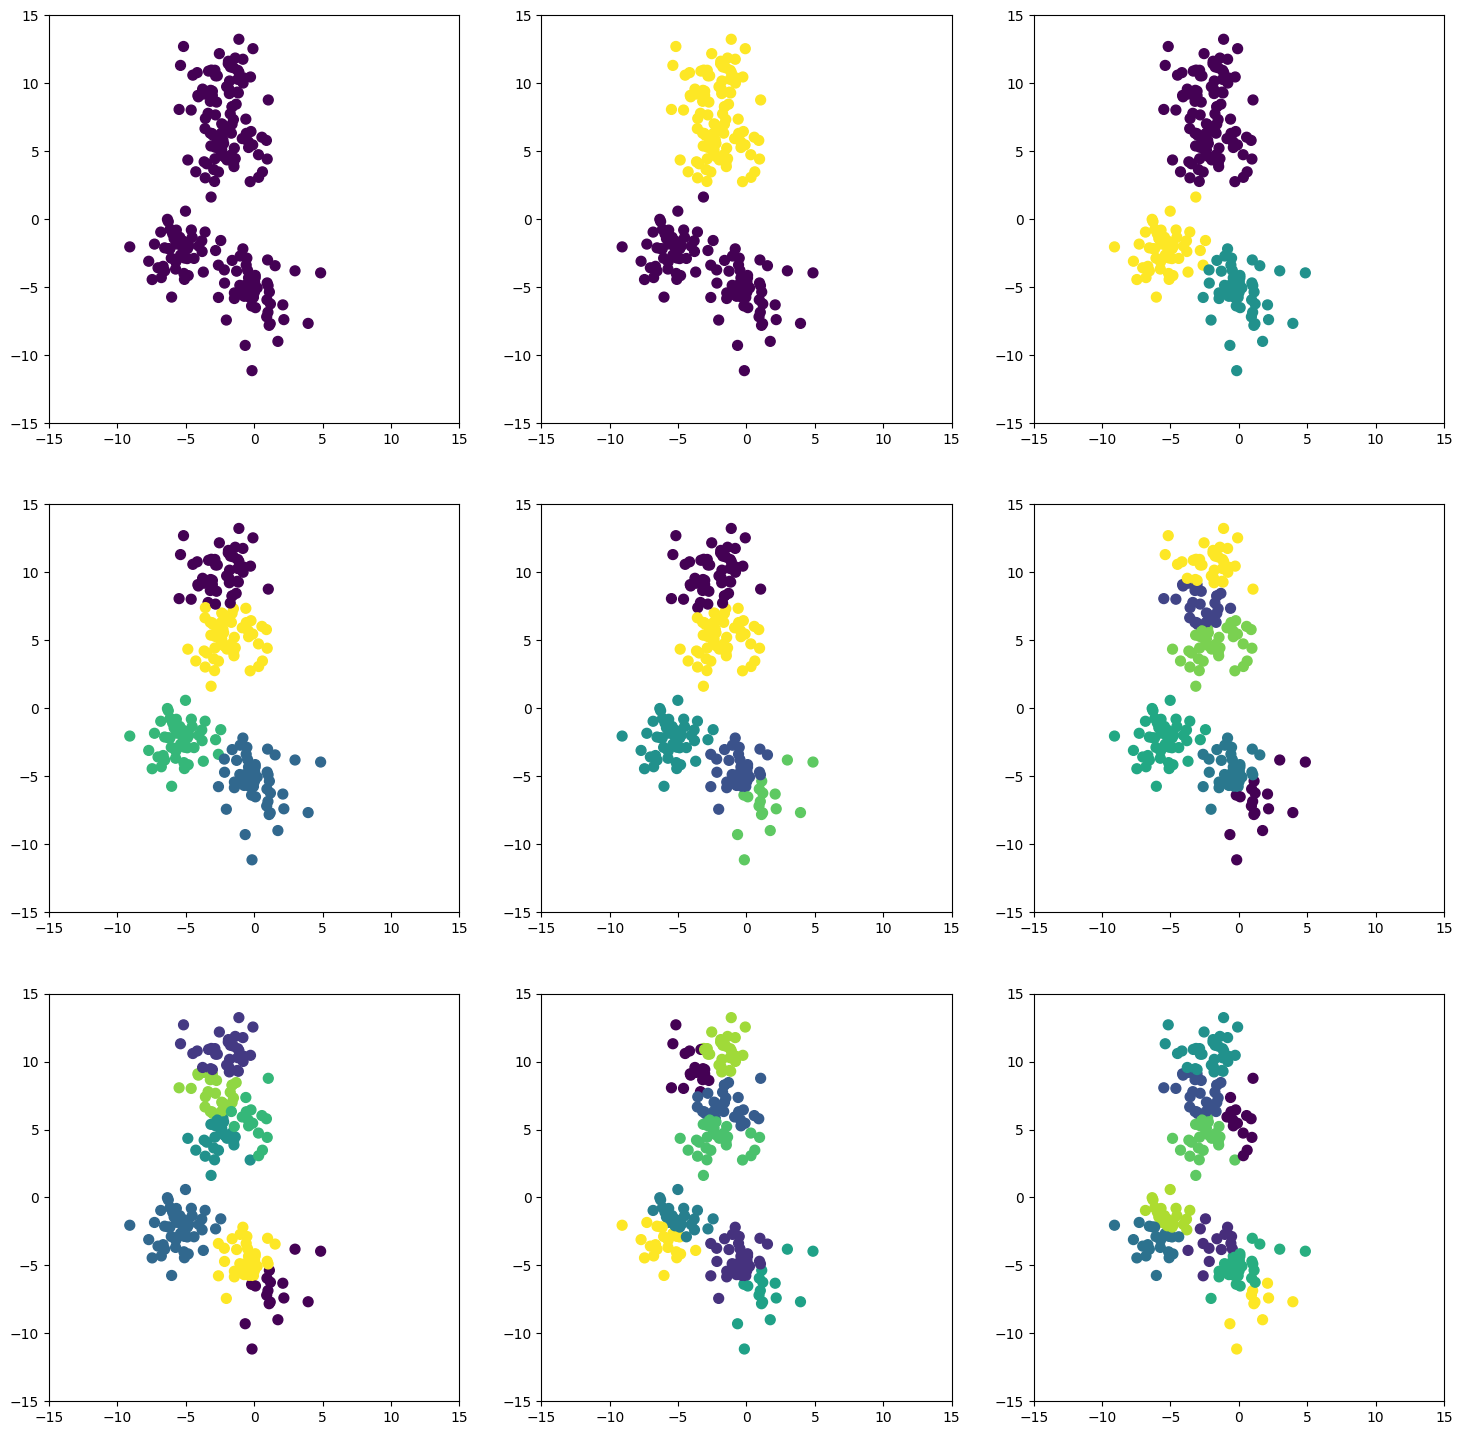

In [11]:

# O valor de k influencia nos agrupamentos
from sklearn.cluster import KMeans
k = 3 # número de clusters
plt.figure(figsize=(18,18))
for k in np.arange(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    plt.subplot(3, 3, k)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
    centers = kmeans.cluster_centers_
    #plt.scatter(center´[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
    plt.xlim(-15,15)
    plt.ylim(-15,15)
plt.show(True)



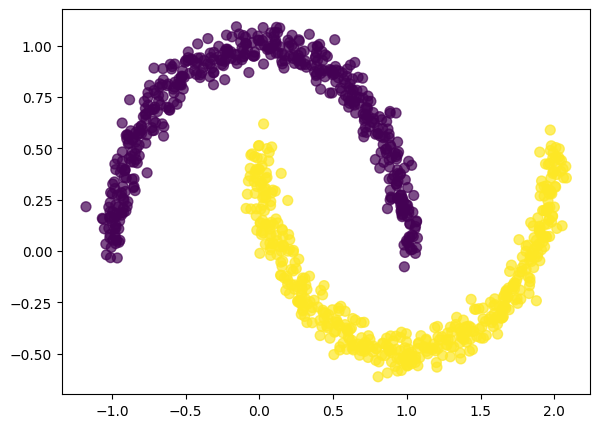

In [12]:

# O algoritmo k-means não é adequado quando temos clusters globulares
# Método Make Moons
from sklearn import cluster, datasets
plt.figure(figsize=(15,5))

# número de observações
n_sample = 1000
# gera os dados
data = datasets.make_moons(n_samples=n_sample, noise=.05)
X = data[0]
labels = data[1]
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=data[1], cmap='viridis', s=50, alpha=0.7)
plt.show(True)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


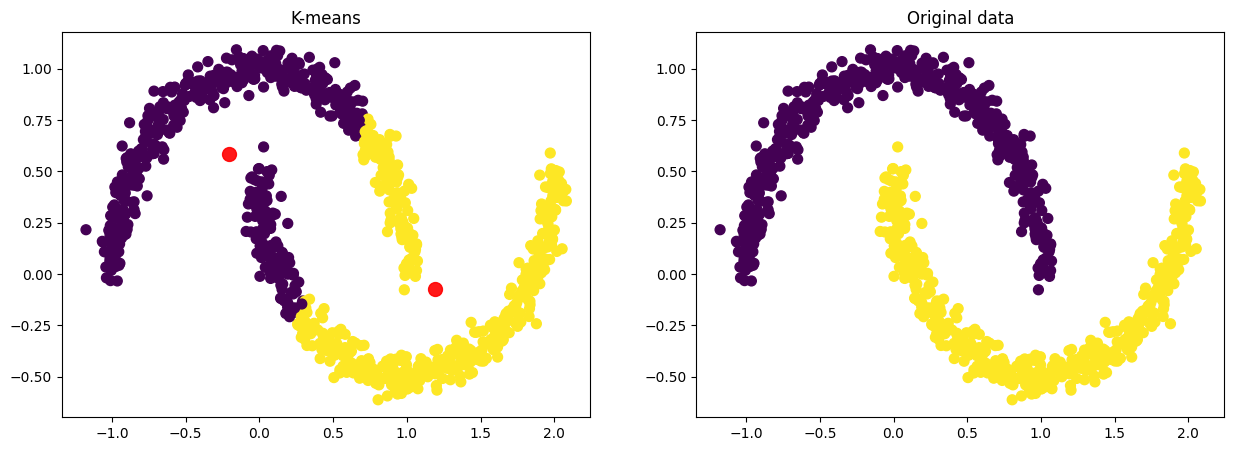

In [13]:
# Notem que o método k-means identifica agrupamentos mesmo em dados aleatórios
from sklearn.cluster import KMeans
plt.figure(figsize=(15,5))

k = 2 # número de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
# mostra os centróides em vermelho
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=0.9);
# mostra o segundo gráfico
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title('Original data')
plt.show(True)



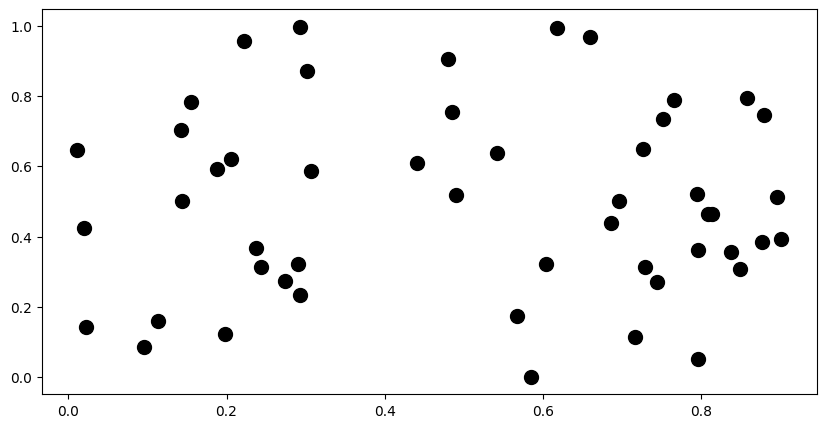

In [14]:
# Notem que o método k-means identifica agrupamentos mesmo em dados aleatórios
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
X = np.random.rand(50,2)
plt.scatter(X[:,0], X[:,1], c='black', s=100)
plt.show(True)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


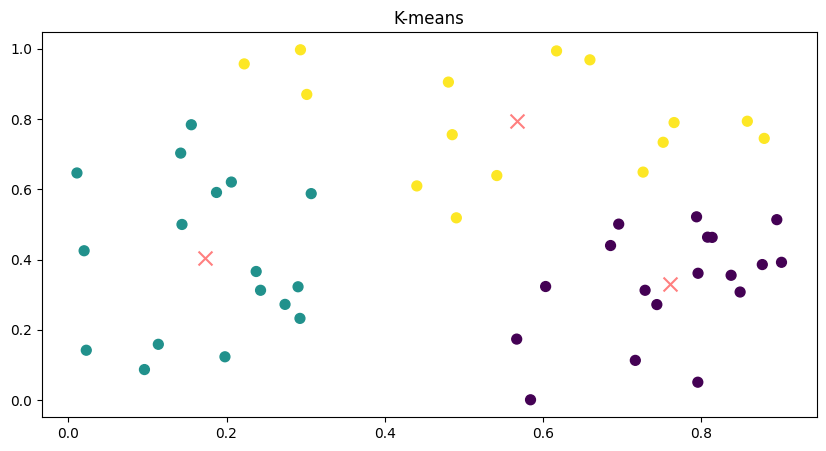

In [15]:
from sklearn.cluster import KMeans

# número de cluster
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, marker = 'x');
plt.title('K-means')
plt.show(True)



